# Entregable 3 (RNN)
Por `Carlos Sánchez Polo`

Asignatura Deep Learning

## Dataset 1

Escoger uno de los tres datasets (datos reales no preparados por Keras o TensorFlow) y realizar lo que
se especifique para cada uno de ellos.

**Dataset1**
* RNN para clasificación
* Pensar como adaptar los datos (raw) para que sean secuencias de datos. Utilizar algún modelo recurrente para clasificar cada secuencia en una de las dos categorı́as.

In [1]:
import os
import re
import pandas as pd

In [2]:
path_selec = "dataset1/"

file_paths = {
    path_selec + "TGFs_NO_BGO.txt": [],
    path_selec + "TGFs_NO_CZT.txt": [],
    path_selec + "TGFs_SI_BGO.txt": [],
    path_selec + "TGFs_SI_CZT.txt": []
}

for file_name in file_paths.keys():
    with open(file_name, "r") as file:
        for line in file:
            file_paths[file_name].append(line.strip())

TGFs_NO_BGO_list = file_paths[path_selec + "TGFs_NO_BGO.txt"]
TGFs_NO_CZT_list = file_paths[path_selec + "TGFs_NO_CZT.txt"]
TGFs_SI_BGO_list = file_paths[path_selec + "TGFs_SI_BGO.txt"]
TGFs_SI_CZT_list = file_paths[path_selec + "TGFs_SI_CZT.txt"]


In [3]:
list_SiNo = [TGFs_NO_BGO_list,
             TGFs_NO_CZT_list,
             TGFs_SI_BGO_list,
             TGFs_SI_CZT_list]

trigers_T = []
for lista in list_SiNo:
    trigers_T.extend(lista)


In [4]:
path_output = "dataset1/Output_counts"
archivos_output = os.listdir(path_output)

trigers_T_set = set(trigers_T)
archivos_output_set = set(archivos_output)

trigers_F =[]
trigers_F_set = archivos_output_set - trigers_T_set
trigers_F = list(trigers_F_set)


In [5]:
BGO_lista = [archivo for archivo in archivos_output if "BGO" in archivo]
CZT_lista = [archivo for archivo in archivos_output if "CZT" in archivo]

Ya tenemos buena parte de los archivos guardados en memoria de forma relativamente estructurada.

La mayoría de los datos son del detector BGO. Vamos a centrarnos en ese tipo de detector. Tenemos 279 entradas de ese tipo. Hay 69 triggers verdaderos de ese detector y 59 triggers falsos (no corresponden a triggers de emisiones de rayos gamma)

In [6]:
# Directorio donde se encuentran los archivos
dir_path = 'dataset1/Output_counts/'

ejemplo = pd.read_csv(dir_path + archivos_output[11], sep='\\s+', header=None, usecols=[0, 4])


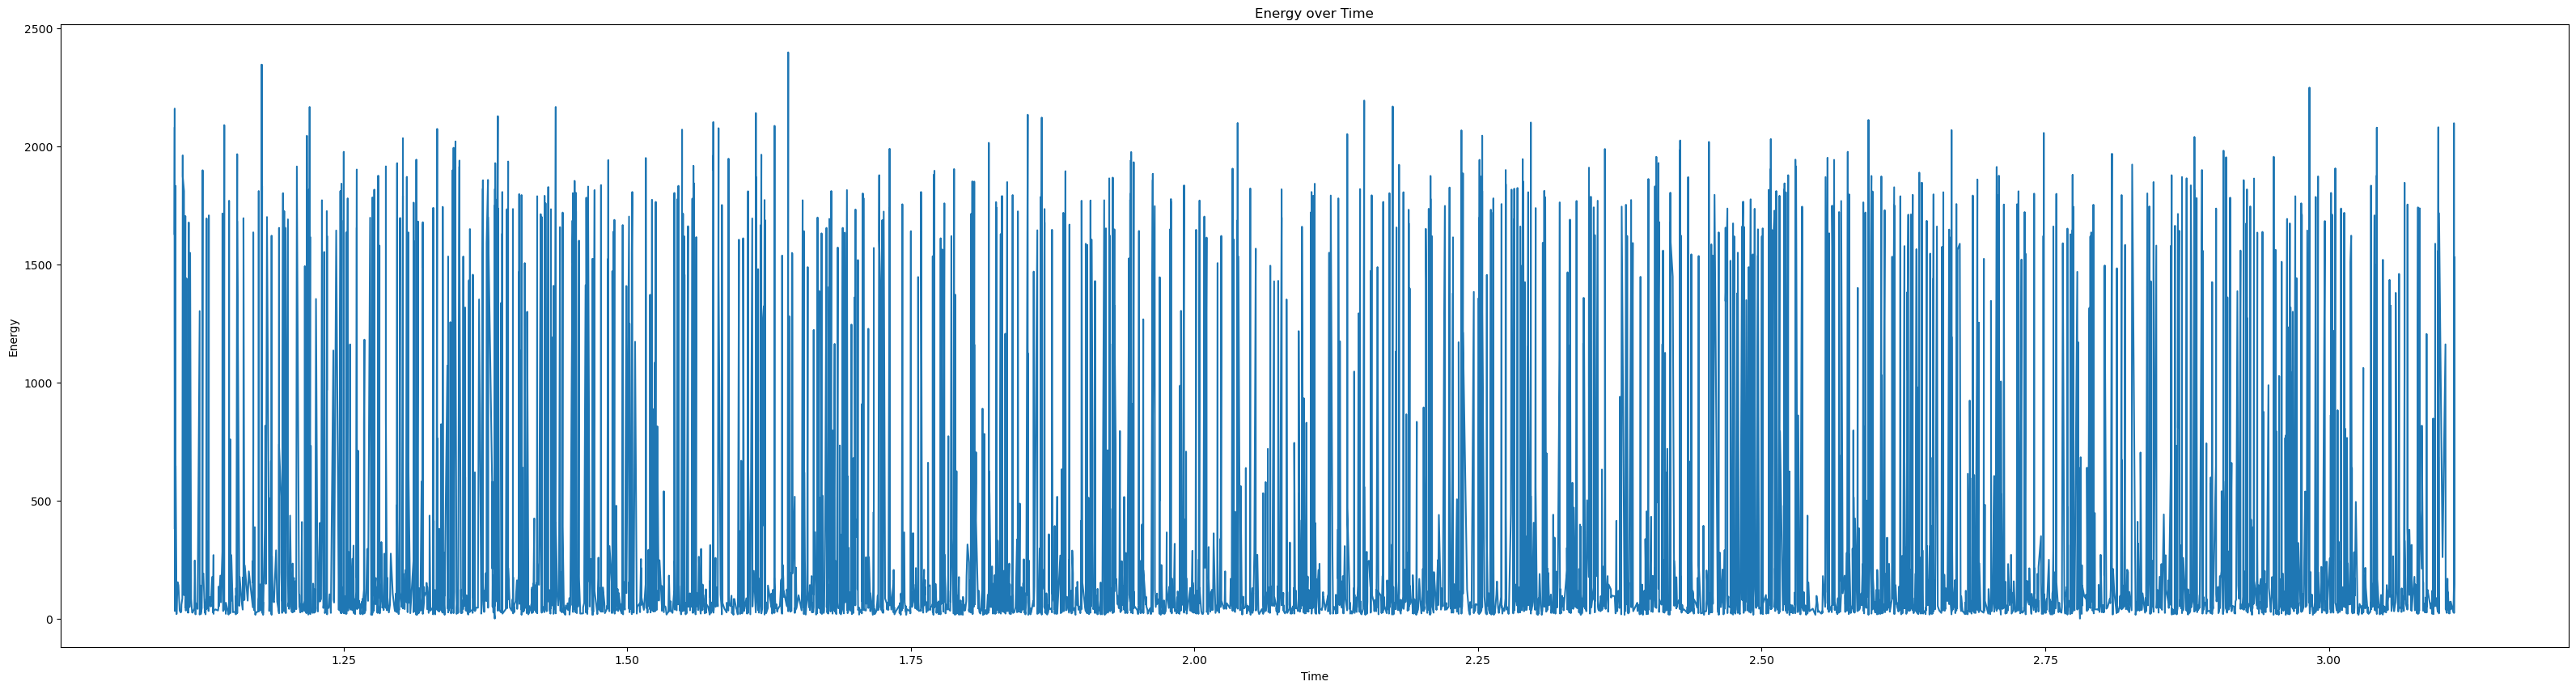

In [7]:
import matplotlib.pyplot as plt

# Asegúrate de que los datos estén en formato numérico
ejemplo[0] = pd.to_numeric(ejemplo[0], errors='coerce')
ejemplo[4] = pd.to_numeric(ejemplo[4], errors='coerce')

plt.figure(figsize=(40, 10))
plt.plot(ejemplo[0], ejemplo[4])
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy over Time')
plt.show()

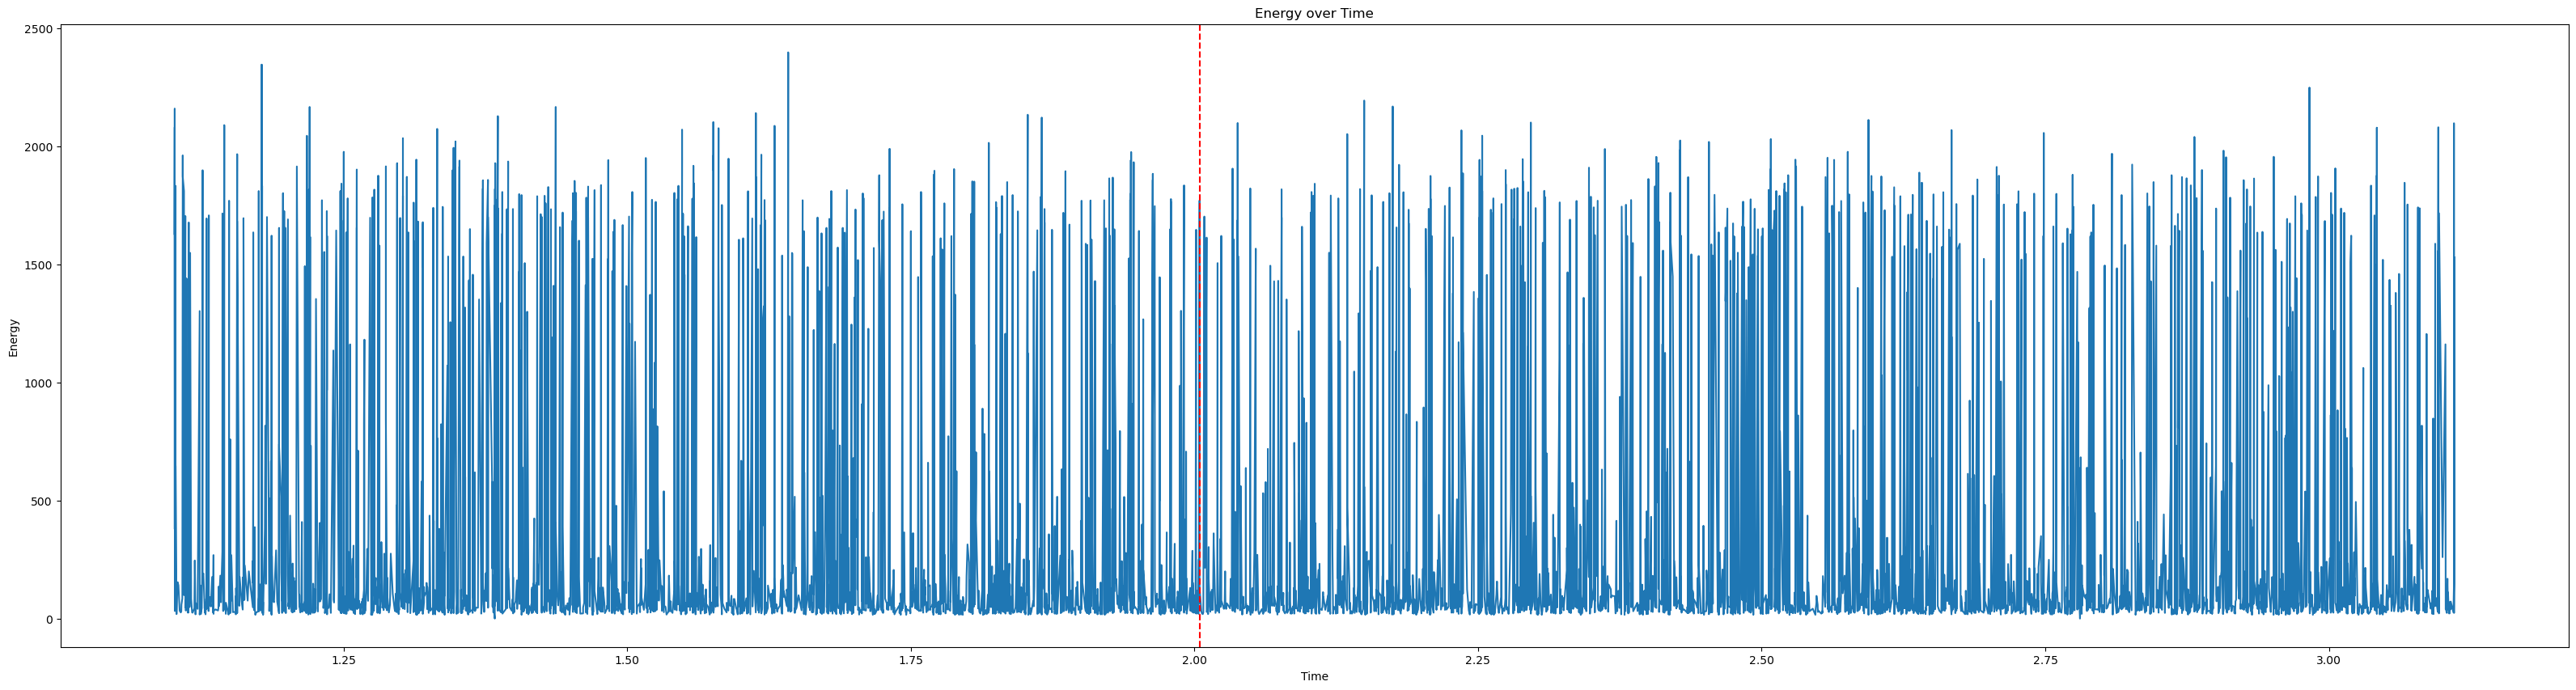

In [8]:
import matplotlib.pyplot as plt

# Time point to highlight
highlight_time = 2.004588e+00

# Find the time value closest to highlight_time
closest_time = ejemplo.iloc[(ejemplo[0]-highlight_time).abs().argsort()[:1]]

# Find the energy value at the closest_time
highlight_energy = closest_time[4].values[0]

plt.figure(figsize=(40, 10))
plt.plot(ejemplo[0], ejemplo[4])
ax = plt.gca()  # Create an instance of the Axes object
ax.axvline(x=highlight_time, color='red', linestyle='--')  # Draw a vertical line on the plot
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy over Time')
plt.show()

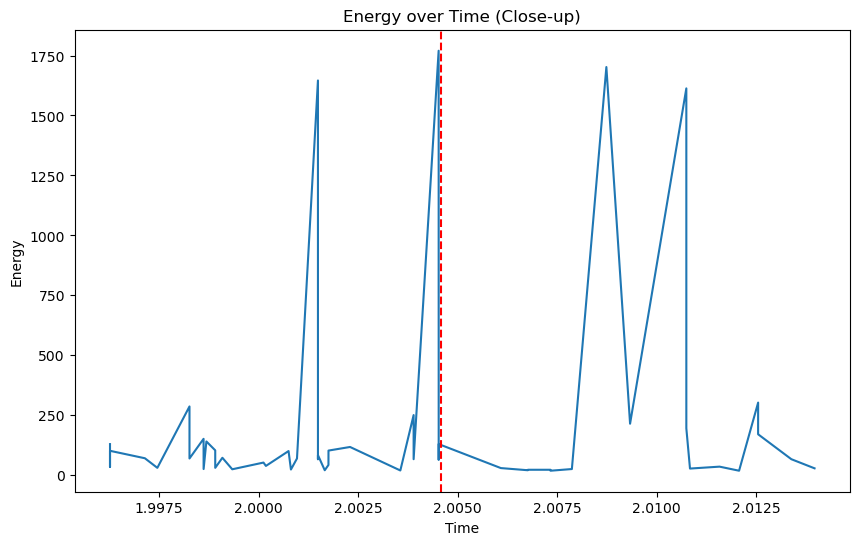

In [9]:
# Define a time window around the highlighted point
time_window = 0.01  # Adjust this value to change the size of the time window

# Select the data within the time window
subset = ejemplo[(ejemplo[0] >= highlight_time - time_window) & (ejemplo[0] <= highlight_time + time_window)]

plt.figure(figsize=(10, 6))
plt.plot(subset[0], subset[4])
ax = plt.gca()  # Create an instance of the Axes object
ax.axvline(x=highlight_time, color='red', linestyle='--')  # Draw a vertical line on the plot
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy over Time (Close-up)')
plt.show()

In [10]:
ejemplo2 = pd.read_csv(dir_path + archivos_output[184], sep='\\s+', header=None, usecols=[0, 4])


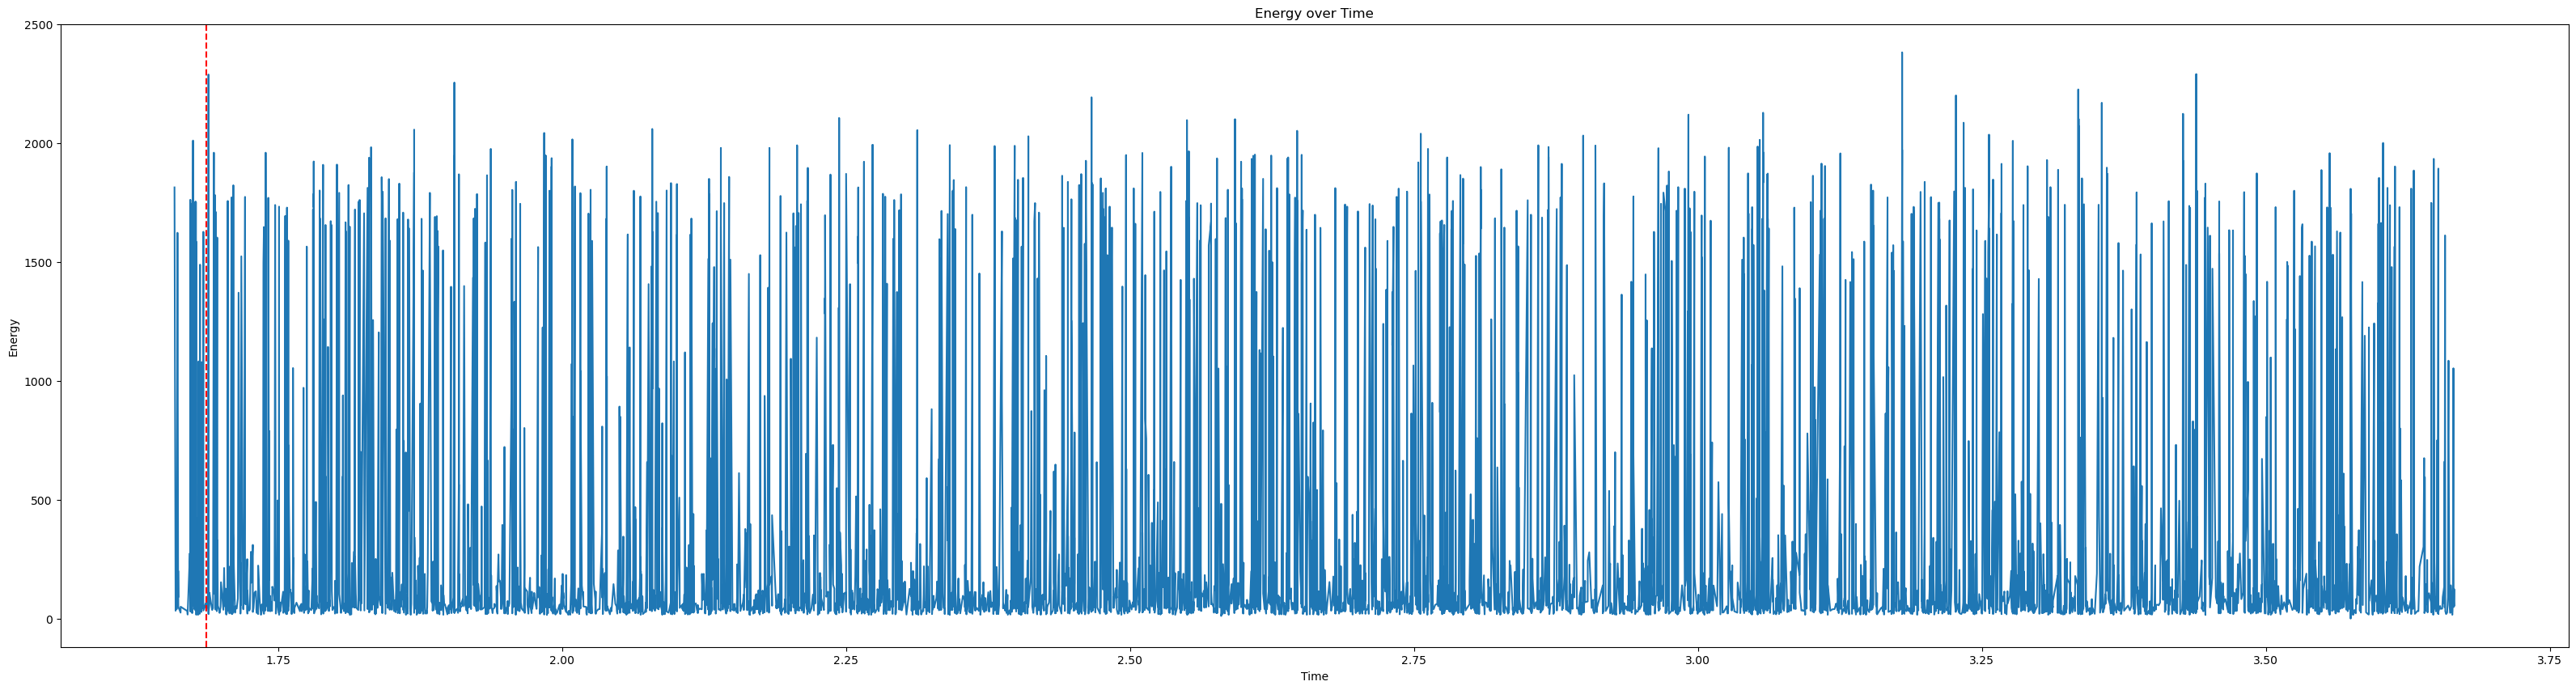

In [11]:
# Time point to highlight
highlight_time = 1.686612

plt.figure(figsize=(40, 10))
plt.plot(ejemplo2[0], ejemplo2[4])
ax = plt.gca()  # Create an instance of the Axes object
ax.axvline(x=highlight_time, color='red', linestyle='--')  # Draw a vertical line on the plot
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy over Time')
plt.show()

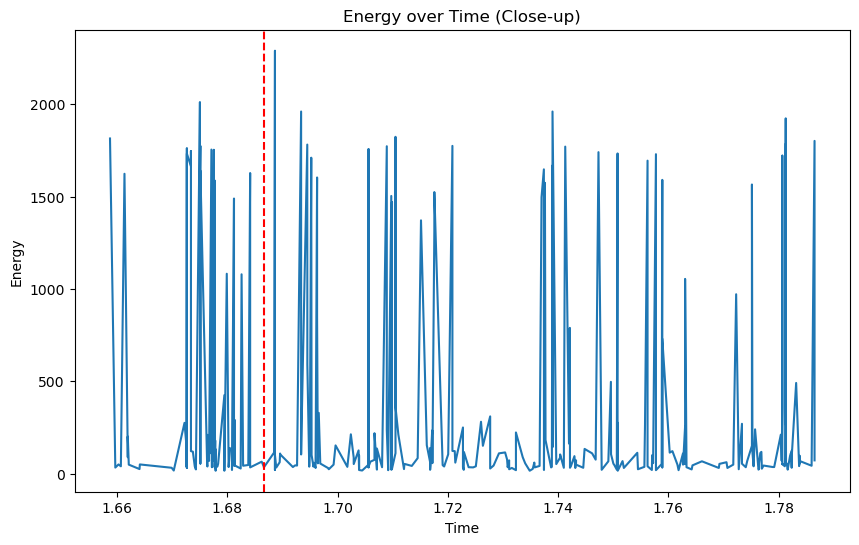

In [12]:
# Define a time window around the highlighted point
time_window = 0.1  # Adjust this value to change the size of the time window

# Select the data within the time window
subset = ejemplo2[(ejemplo2[0] >= highlight_time - time_window) & (ejemplo2[0] <= highlight_time + time_window)]

plt.figure(figsize=(10, 6))
plt.plot(subset[0], subset[4])
ax = plt.gca()  # Create an instance of the Axes object
ax.axvline(x=highlight_time, color='red', linestyle='--')  # Draw a vertical line on the plot
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy over Time (Close-up)')
plt.show()

In [48]:
valores_SI = []

for ind in range(0, len(TGFs_SI_CZT_list)):
    lectura = pd.read_csv(dir_path + TGFs_SI_CZT_list[ind], sep='\\s+', header=None, usecols=[0, 4])

    # Expresión regular para extraer el tiempo
    pattern = r'CZT_counts_(\d+)us_V64_'

    # Extraer el tiempo del primer elemento de la lista
    match = re.search(pattern, TGFs_SI_CZT_list[ind])
    if match:
        microsegundos = match.group(1)
    else:
        microsegundos = None

    print(microsegundos)
    segundo_encontrado = None

    # Convertir los microsegundos a formato de tiempo
    microsegundos_formato_tiempo = '.' + str(microsegundos)

    for valor in lectura[0]:  # Asumiendo que la primera columna no tiene nombre
        # Convertir el valor a string para poder usar endswith
        valor_str = str(valor)
        if valor_str.endswith(microsegundos_formato_tiempo):
        # Obtener el segundo de la marca de tiempo
            segundo_encontrado = valor_str.split('.')[0]
            break

    if segundo_encontrado:
        print(f"El segundo correspondiente a los microsegundos {microsegundos} es {segundo_encontrado}")
        valores_SI.append((ind, microsegundos, segundo_encontrado))
    else:
        print(f"No se encontró ningún segundo correspondiente a los microsegundos {microsegundos}")




66139
No se encontró ningún segundo correspondiente a los microsegundos 66139
268602
No se encontró ningún segundo correspondiente a los microsegundos 268602
272113
No se encontró ningún segundo correspondiente a los microsegundos 272113
273218
El segundo correspondiente a los microsegundos 273218 es 2
285107
El segundo correspondiente a los microsegundos 285107 es 2
66074
No se encontró ningún segundo correspondiente a los microsegundos 66074
297183
No se encontró ningún segundo correspondiente a los microsegundos 297183
310555
El segundo correspondiente a los microsegundos 310555 es 2
403408
El segundo correspondiente a los microsegundos 403408 es 2
314518
No se encontró ningún segundo correspondiente a los microsegundos 314518
321252
No se encontró ningún segundo correspondiente a los microsegundos 321252
496550
No se encontró ningún segundo correspondiente a los microsegundos 496550
324222
No se encontró ningún segundo correspondiente a los microsegundos 324222
324660
No se encontr

In [49]:
valores_NO = []

for ind in range(0, len(TGFs_NO_CZT_list)):
    lectura = pd.read_csv(dir_path + TGFs_NO_CZT_list[ind], sep='\\s+', header=None, usecols=[0, 4])

    # Expresión regular para extraer el tiempo
    pattern = r'CZT_counts_(\d+)us_V64_'

    # Extraer el tiempo del primer elemento de la lista
    match = re.search(pattern, TGFs_SI_CZT_list[ind])
    if match:
        microsegundos = match.group(1)
    else:
        microsegundos = None

    print(microsegundos)
    segundo_encontrado = None

    # Convertir los microsegundos a formato de tiempo
    microsegundos_formato_tiempo = '.' + str(microsegundos)

    for valor in lectura[0]:  
        # Convertir el valor a string para poder usar endswith
        valor_str = str(valor)
        if valor_str.endswith(microsegundos_formato_tiempo):
        # Obtener el segundo de la marca de tiempo
            segundo_encontrado = valor_str.split('.')[0]
            break

    if segundo_encontrado:
        print(f"El segundo correspondiente a los microsegundos {microsegundos} es {segundo_encontrado}")
        valores_NO.append((ind, microsegundos, segundo_encontrado))
    else:
        print(f"No se encontró ningún segundo correspondiente a los microsegundos {microsegundos}")



66139
No se encontró ningún segundo correspondiente a los microsegundos 66139
268602
No se encontró ningún segundo correspondiente a los microsegundos 268602
272113
No se encontró ningún segundo correspondiente a los microsegundos 272113
273218
No se encontró ningún segundo correspondiente a los microsegundos 273218
285107
No se encontró ningún segundo correspondiente a los microsegundos 285107
66074
No se encontró ningún segundo correspondiente a los microsegundos 66074
297183
No se encontró ningún segundo correspondiente a los microsegundos 297183
310555
No se encontró ningún segundo correspondiente a los microsegundos 310555
403408
No se encontró ningún segundo correspondiente a los microsegundos 403408


In [50]:
valores_SI_BGO = []

for ind in range(0, len(TGFs_SI_BGO_list)):
    lectura = pd.read_csv(dir_path + TGFs_SI_BGO_list[ind], sep='\\s+', header=None, usecols=[0, 4])

    # Expresión regular para extraer el tiempo
    pattern = r'BGO_counts_(\d+)us_V64_'

    # Extraer el tiempo del primer elemento de la lista
    match = re.search(pattern, TGFs_SI_BGO_list[ind])
    if match:
        microsegundos = match.group(1)
    else:
        microsegundos = None

    print(microsegundos)
    segundo_encontrado = None

    # Convertir los microsegundos a formato de tiempo
    microsegundos_formato_tiempo = '.' + str(microsegundos)

    for valor in lectura[0]:  
        # Convertir el valor a string para poder usar endswith
        valor_str = str(valor)
        if valor_str.endswith(microsegundos_formato_tiempo):
        # Obtener el segundo de la marca de tiempo
            segundo_encontrado = valor_str.split('.')[0]
            break

    if segundo_encontrado:
        print(f"El segundo correspondiente a los microsegundos {microsegundos} es {segundo_encontrado}")
        valores_SI_BGO.append((ind, microsegundos, segundo_encontrado))
    else:
        print(f"No se encontró ningún segundo correspondiente a los microsegundos {microsegundos}")


66139
No se encontró ningún segundo correspondiente a los microsegundos 66139
264718
El segundo correspondiente a los microsegundos 264718 es 2
268602
El segundo correspondiente a los microsegundos 268602 es 2
272113
El segundo correspondiente a los microsegundos 272113 es 2
273218
No se encontró ningún segundo correspondiente a los microsegundos 273218
285107
No se encontró ningún segundo correspondiente a los microsegundos 285107
66074
No se encontró ningún segundo correspondiente a los microsegundos 66074
297183
El segundo correspondiente a los microsegundos 297183 es 2
310555
No se encontró ningún segundo correspondiente a los microsegundos 310555
403408
El segundo correspondiente a los microsegundos 403408 es 2
314518
El segundo correspondiente a los microsegundos 314518 es 2
321252
El segundo correspondiente a los microsegundos 321252 es 2
496550
No se encontró ningún segundo correspondiente a los microsegundos 496550
324222
El segundo correspondiente a los microsegundos 324222 e

In [51]:
valores_NO_BGO = []

for ind in range(0, len(TGFs_NO_BGO_list)):
    lectura = pd.read_csv(dir_path + TGFs_NO_BGO_list[ind], sep='\\s+', header=None, usecols=[0, 4])

    # Expresión regular para extraer el tiempo
    pattern = r'BGO_counts_(\d+)us_V64_'

    # Extraer el tiempo del primer elemento de la lista
    match = re.search(pattern, TGFs_NO_BGO_list[ind])
    if match:
        microsegundos = match.group(1)
    else:
        microsegundos = None

    print(microsegundos)
    segundo_encontrado = None

    # Convertir los microsegundos a formato de tiempo
    microsegundos_formato_tiempo = '.' + str(microsegundos)

    for valor in lectura[0]:  
        # Convertir el valor a string para poder usar endswith
        valor_str = str(valor)
        if valor_str.endswith(microsegundos_formato_tiempo):
        # Obtener el segundo de la marca de tiempo
            segundo_encontrado = valor_str.split('.')[0]
            break

    if segundo_encontrado:
        print(f"El segundo correspondiente a los microsegundos {microsegundos} es {segundo_encontrado}")
        valores_NO_BGO.append((ind, microsegundos, segundo_encontrado))
    else:
        print(f"No se encontró ningún segundo correspondiente a los microsegundos {microsegundos}")

0
No se encontró ningún segundo correspondiente a los microsegundos 0
0
No se encontró ningún segundo correspondiente a los microsegundos 0
0
No se encontró ningún segundo correspondiente a los microsegundos 0
0
No se encontró ningún segundo correspondiente a los microsegundos 0
0
No se encontró ningún segundo correspondiente a los microsegundos 0
104324
No se encontró ningún segundo correspondiente a los microsegundos 104324
114879
No se encontró ningún segundo correspondiente a los microsegundos 114879
119392
El segundo correspondiente a los microsegundos 119392 es 2
139583
No se encontró ningún segundo correspondiente a los microsegundos 139583
529167
El segundo correspondiente a los microsegundos 529167 es 2
142002
No se encontró ningún segundo correspondiente a los microsegundos 142002
149357
No se encontró ningún segundo correspondiente a los microsegundos 149357
452238
El segundo correspondiente a los microsegundos 452238 es 2
539116
No se encontró ningún segundo correspondiente

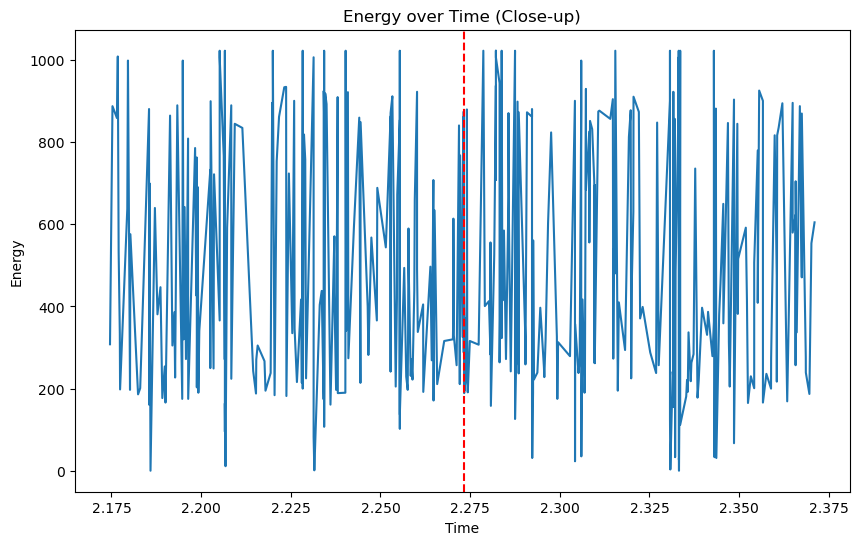

In [66]:

pint = valores_SI[0][0]
micr = valores_SI[0][1]
segu = valores_SI[0][2]
tstamp = float(str(segu) + '.' + str(micr))

caso = pd.read_csv(dir_path + TGFs_SI_CZT_list[pint], sep='\\s+', header=None, usecols=[0, 7])

# Define a time window around the highlighted point
time_window = 0.1  # Adjust this value to change the size of the time window

# Select the data within the time window
subset = caso[(caso[0] >= tstamp - time_window) & (caso[0] <= tstamp + time_window)]

plt.figure(figsize=(10, 6))
plt.plot(subset[0], subset[7])
ax = plt.gca()  # Create an instance of the Axes object
ax.axvline(x=tstamp, color='red', linestyle='--')  # Draw a vertical line on the plot
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy over Time (Close-up)')
plt.show()

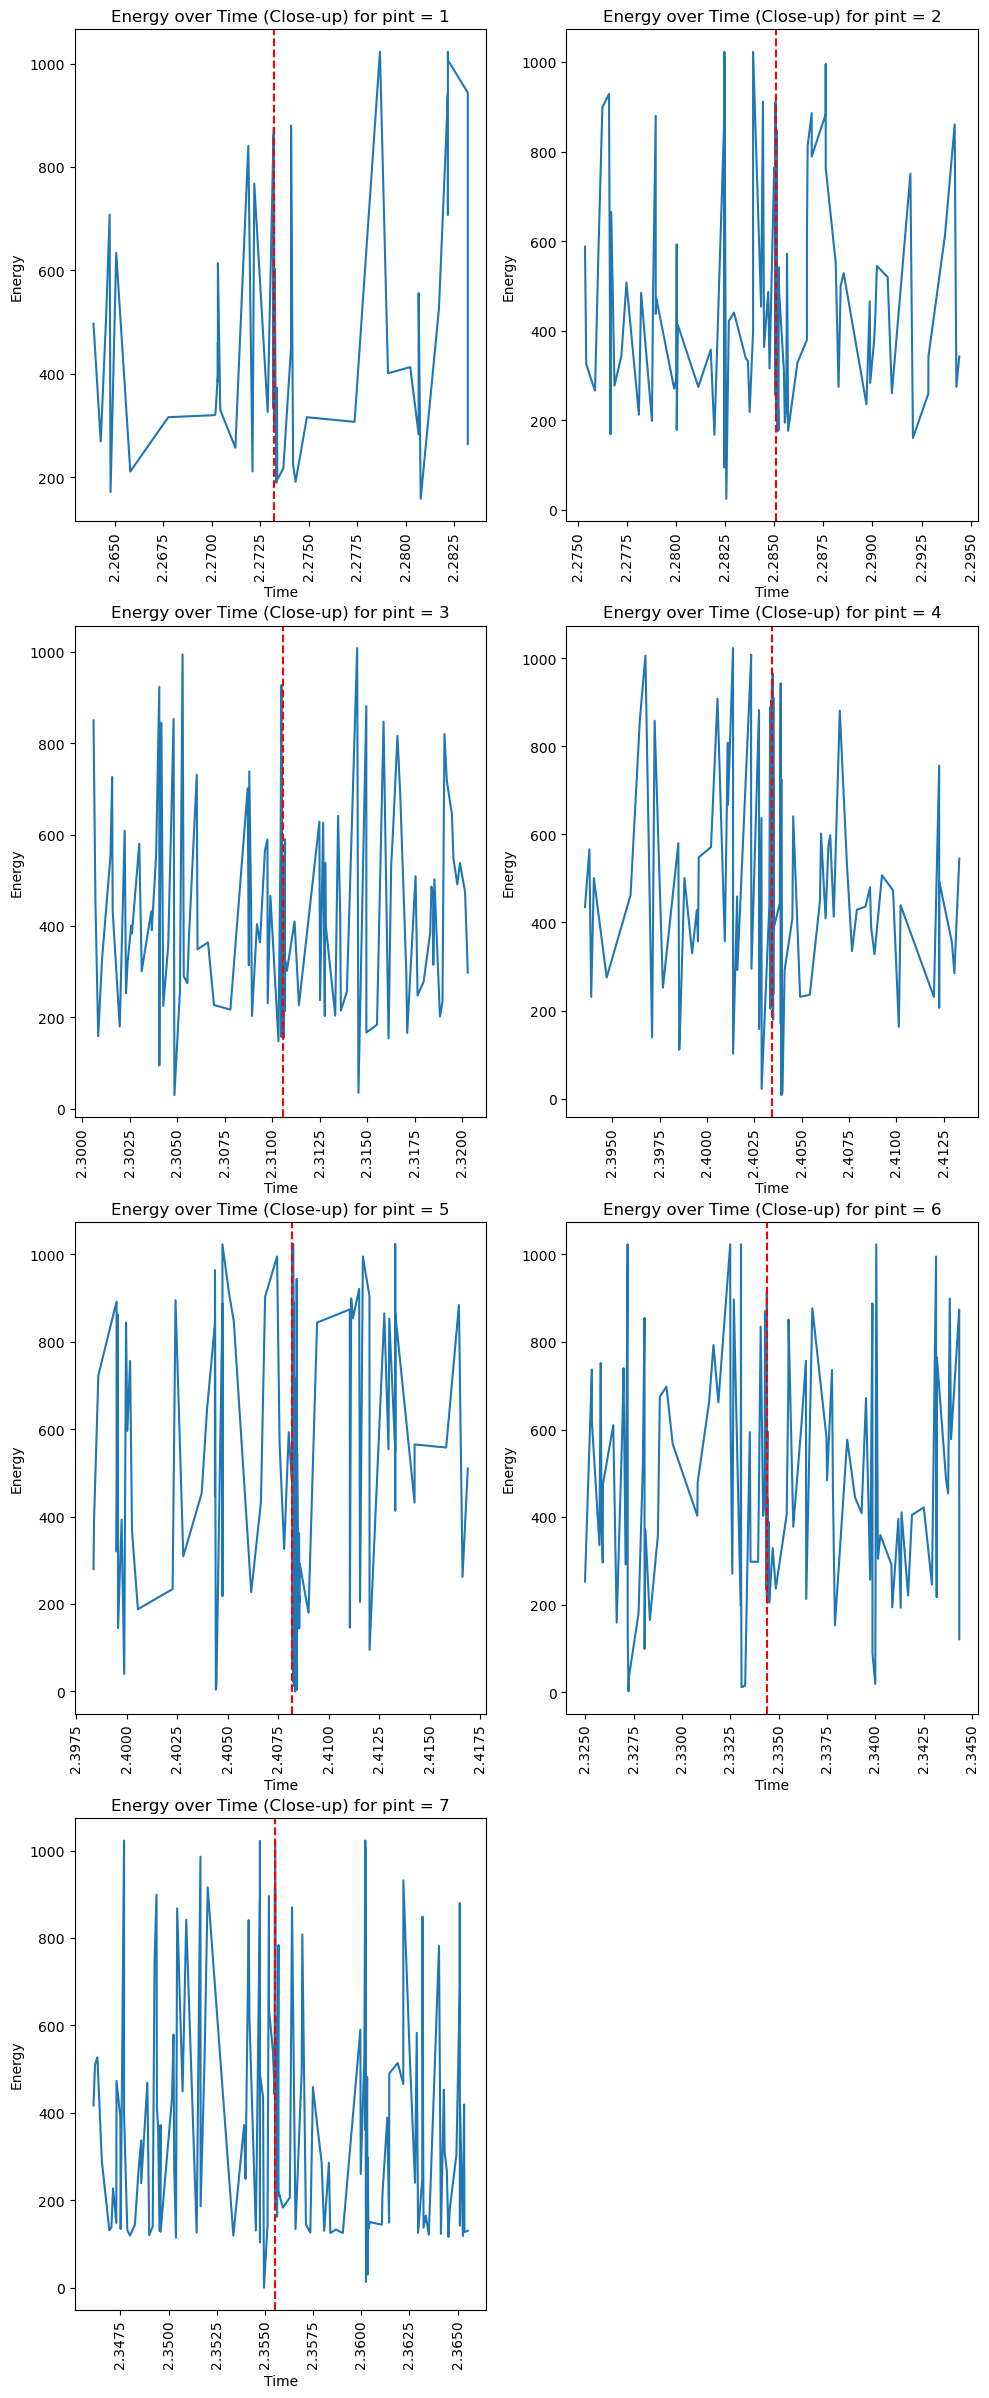

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define el número de filas y columnas para los subplots
nrows = int(np.ceil(len(valores_SI) / 2))
ncols = 2

fig, axs = plt.subplots(nrows, ncols, figsize=(10, 6*nrows))

i_pint = 0
for i, valor in enumerate(valores_SI):
    i_pint += 1
    pint = valor[0]
    micr = valor[1]
    segu = valor[2]
    tstamp = float(str(segu) + '.' + str(micr))

    caso = pd.read_csv(dir_path + TGFs_SI_CZT_list[pint], sep='\\s+', header=None, usecols=[0, 7])

    # Define a time window around the highlighted point
    time_window = 0.01  # Adjust this value to change the size of the time window

    # Select the data within the time window
    subset = caso[(caso[0] >= tstamp - time_window) & (caso[0] <= tstamp + time_window)]

    # Determine the current subplot
    ax = axs[i // ncols, i % ncols]

    ax.plot(subset[0], subset[7])
    ax.axvline(x=tstamp, color='red', linestyle='--')  # Draw a vertical line on the plot
    ax.set_xlabel('Time')
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90)
    ax.set_ylabel('Energy')
    ax.set_title(f'Energy over Time (Close-up) for pint = {i_pint}')

# Remove empty subplots
if len(valores_SI) % 2 != 0:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.show()

## NOTA:

Aunque pareciera lo contrario, he trabajado bastante en este ejercicio. Como se comentó en clase, la dificultad no solo radica en los modelos RNN si no en la calidad de los datos. Contamos con pocas muestras tanto de los detectores BGO como de los CZT. La forma en la que se han guardado los datos dificulta más la tarea. En bastantes casos se indica el milisegundo del trigger pero no se indica de que segundo. Uno intenta buscar el segundo por coincidencia, pero a veces no existe dicha coincidencia. Por otro lado tenemos cantidades ingentes de cuentas (impactos de rayos gamma) en intervalos de tiempo asimétricos. Este dataset necesita de mayor tratamiento que el aquí presente, y más datos de CZT, que al contar con menos de 50 usables, no hay red que pueda ser entrenada.

Al final he aprendido mucho de como importar valores y nombres y archivos de distintos directorios con formas varias, pero no he podido resolver el problema.

**Carlos Sánchez Polo**